# **STAT301 Group 21 Project**

Group 21: 
- Angela Yandrofski (23876006) 
- Justin Zhu (57963423)
- Shuri Yamamoto (73199234)
- Yiwen Guo (

---------

## **Introduction:** 

#### **Relevant Background Information**

Understanding the monthly income you earn from your job is important; we all want to know what characteristics determine how much money we can earn. One existing literature investigates how employee income and job satisfaction can be related, and how other characteristics such as age; and tenure can have significant effects on job satisfaction (Bakan et al 2013). Much of the existing literature covers how much of an impact compensation has on an employee's performance, tenure, etc; We, however, want to explore how we may use such characteristics like age; or job satisfaction to see if we can predict an employee's monthly income. Another such literature shows they want to determine how different employee benefits can be associated with company performance measures (Ranta et al 2023). Understanding monthly income is important for both employees and employers because it gives employees more economic stability if they understand the factors that go into their monthly income, gives them room and understanding for salary negotiations against peers, and allows them to optimize the career path they take to achieve higher monthly income. It also helps employers understand how they can become more competitive for people looking for jobs, and how they are able to motivate employees and make sure there is high job satisfaction that keeps employees at their company (Hijuzaman et al. 2022). Understanding monthly income makes sure that employees are valued for the positions they hold and the time they’ve spent at the company, as employee retention is incredibly important to make sure a company stays organized and strong compared to the market (Iqbal et al. 2017). 

We have come up with 1 possible question:
- Can we determine the monthly income of an employee based on certain characteristics of individuals at the company? If yes, can we quantify the relationship? 

The dataset chosen is a dataset of HR Analytics with 1470 observations and 35 variables.This HR analytics dataset was collected for the HR department to make sure that the organization is running as it should and to gain insights into the organization, and the dataset came from Kaggle.
- The **Continuous Numeric** Variables are: Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
- The **Categorical Variables** (all of which are nominal except attrition and over18) are: Attrition (which is a binary variable because its Yes / No), BuisnessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18 (which is also a binary variable because it's Yes / No), EmployeeNumber (which is a unique value given to each of the employees)
EmployeeCount and StandardHours are both constant variables set at 1 and 80 respectively (not very important at all to the dataset or to the project)
- The **Ordinal Variables** are: Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel (0 to 3), WorkLifeBalance. Most of which are rankings from 1 to 4 or 5.

#### **Question:**

We have chosen to focus on the question: **Can we determine the monthly income of an employee based on certain characteristics of individuals at the company? If yes, can we quantify the relationship?**
- **Response variable:** Monthly Income
- **Explanatory variables:** will be chosen via forward selection in the EDA section to determine the most influential characteristics for monthly income. 
- This question is focused on both prediction and inference as we are trying to predict precise monthly income predictions based on characteristics from the dataset, and we are aiming to determine which characteristics significantly impact employee monthly income.


## **Methods and Results:**

### **Exploratory Data Analysis (EDA)**

In [1]:
# packages <- c("broom", "latex2exp", "tidymodels", "repr", "gridExtra", "faraway", 
#               "mltools", "leaps", "glmnet", "tidyverse", "modelr", "infer", "GGally", "patchwork")

# install_if_missing <- function(packages) {
#   for (pkg in packages) {
#     if (!require(pkg, character.only = TRUE)) {
#       install.packages(pkg, dependencies = TRUE)
#     }
#   }
# }
# install_if_missing(packages)
library(broom)
library(latex2exp)
library(tidymodels)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(tidyverse)
library(modelr)
library(infer)
library(cowplot)
library(GGally)
library(tidyverse)
library(patchwork)


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object is masked from ‘package:tidyr’:

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,⋯,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,⋯,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,⋯,4,4,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,⋯,3,2,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,⋯,3,3,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,⋯,3,4,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,⋯,3,3,0,8,2,2,7,7,3,6


[1] 31

[1] 1470

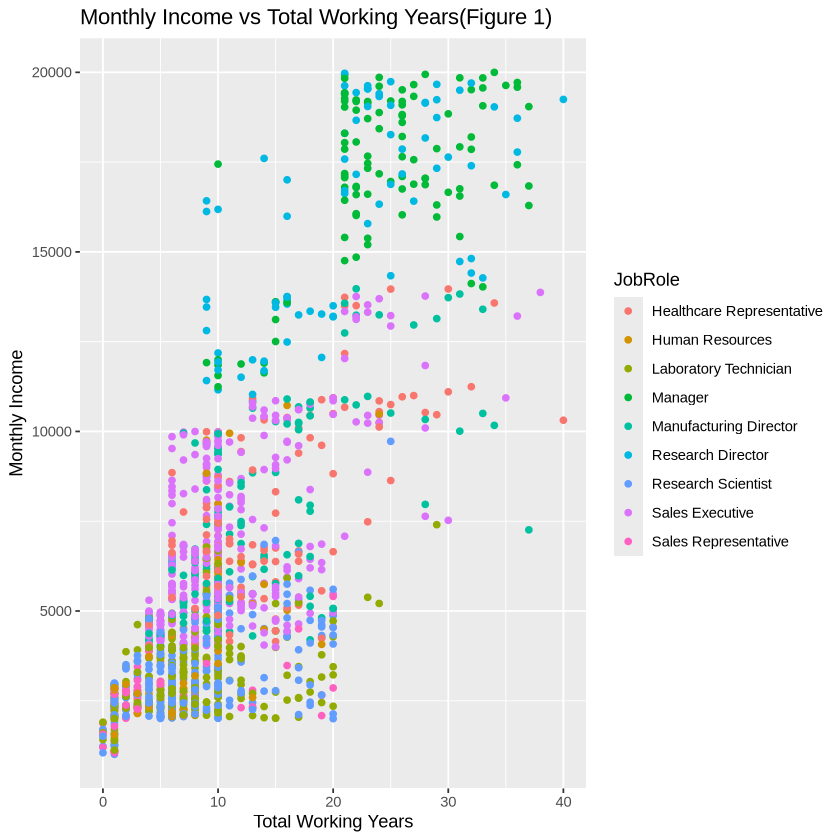

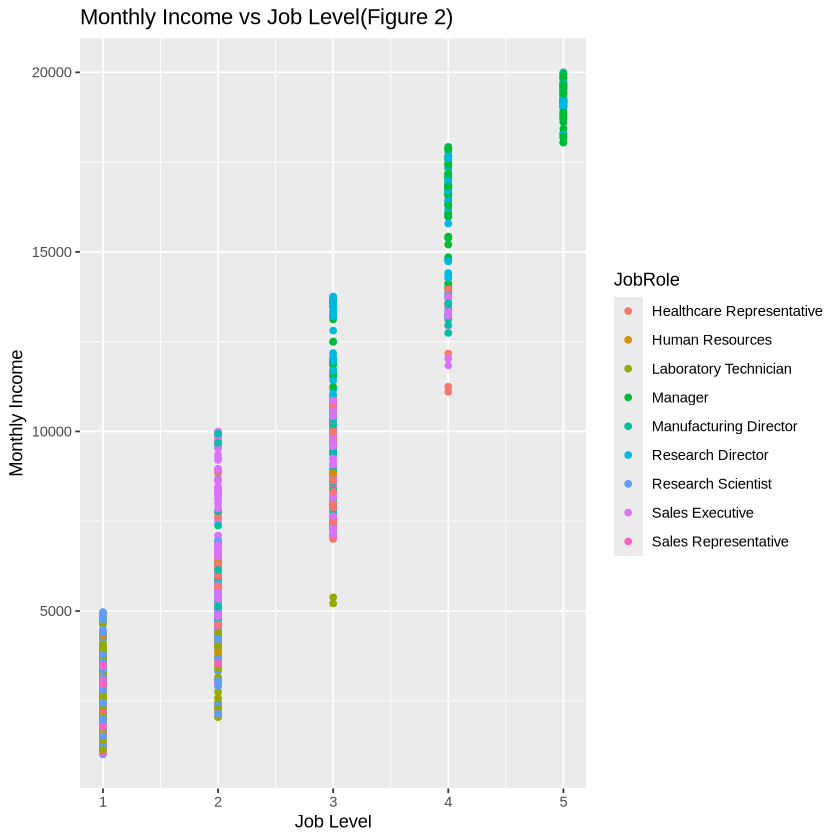

In [3]:
# Main developers: Justin Zhu
# Contributor: Angela Yandrofski, Shuri Yamamoto, Yiwen Guo 



# Remove "Over-18", "EmployeeCount", "EmployeeNumber", and "StandardHours" columns
HR_data <- read.csv('HR-Employee-Attrition.csv') %>% select(-Over18, -EmployeeCount,-EmployeeNumber, -StandardHours)
head(HR_data)
num_variables <- ncol(HR_data)
num_observations <- nrow(HR_data)
num_variables
num_observations

set.seed(555)
# Split the data into training (70%) and testing (30%) sets
hr_split <- 
    HR_data %>%
    initial_split(prop = 0.7, strata = MonthlyIncome)

training_hr <- training(hr_split)
testing_hr <- testing(hr_split)


# Create the scatter plots with y = monthly income and x being totalworkingyears and colored by job roles.
scatterplot1 <- ggplot(HR_data, aes(y = MonthlyIncome, x = TotalWorkingYears, color = JobRole)) +
  geom_point() +
  xlab("Total Working Years") +
  ylab("Monthly Income") +
  ggtitle("Monthly Income vs Total Working Years(Figure 1)")

# Create the scatter plots with y = monthly income and x being JobLevel and coloured by job roles.
scatterplot2 <- ggplot(HR_data, aes(y = MonthlyIncome, x = JobLevel, color = JobRole)) +
  geom_point() +
  xlab("Job Level") +
  ylab("Monthly Income") +
  ggtitle("Monthly Income vs Job Level(Figure 2)")

scatterplot1
scatterplot2

### Raw Data Plot Explanation

#### Figure 1. **Monthly Income vs Total Working Years**
  - This plot is about the relationship between the total number of years an employee has worked and their current monthly income. Total working years often correlate with an employee's expertise and position level.

#### Figure 2. **Monthly Income vs Job Level**
  - This scatterplot highlights the relationship between an employee's job level and their monthly income. Job level is a strong indicator of an employee's hierarchical position in the company, which directly influences their salary.

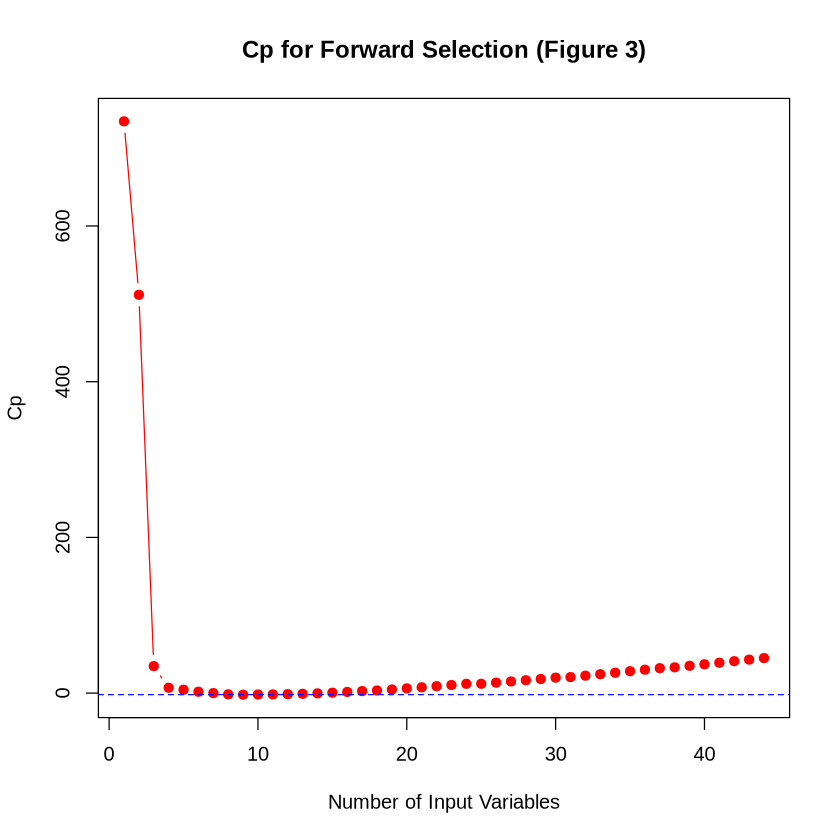

In [4]:
# Main developers: Justin Zhu
# Contributor: Angela Yandrofski, Shuri Yamamoto, Yiwen Guo 

# Forward selection to choose the best predictors for MonthlyIncome
hr_forward_sel <- regsubsets(x = MonthlyIncome ~ ., nvmax = 45,
                                  data = training_hr,
                                  method = "forward")

# Create a summary of the forward selection process
hr_forward_summary <- summary(hr_forward_sel)

# Plot Mallows' Cp statistic for each number of input variables
plot(
    summary(hr_forward_sel)$cp,
    main = "Cp for Forward Selection (Figure 3)",
    xlab = "Number of Input Variables", 
    ylab = "Cp",
    type = "b",
    pch = 19,
    col = "red"
)

# Add a horizontal line at the minimum Cp value
abline(h = min(summary(hr_forward_sel)$cp), col = "blue", lty = 2)

In [5]:
# Main developers: Justin Zhu
# Contributor: Angela Yandrofski, Shuri Yamamoto, Yiwen Guo 

# Identify the index of the minimum Cp value
cp_min = which.min(hr_forward_summary$cp) 
cp_min

# Extract the names of the selected variables 
selected_var <- names(coef(hr_forward_sel, cp_min))[-1]
selected_var

[1] 9

[1] "JobLevel"                     "JobRoleLaboratory Technician"
[3] "JobRoleManager"               "JobRoleResearch Director"    
[5] "JobRoleResearch Scientist"    "JobRoleSales Representative" 
[7] "NumCompaniesWorked"           "TotalWorkingYears"           
[9] "YearsSinceLastPromotion"

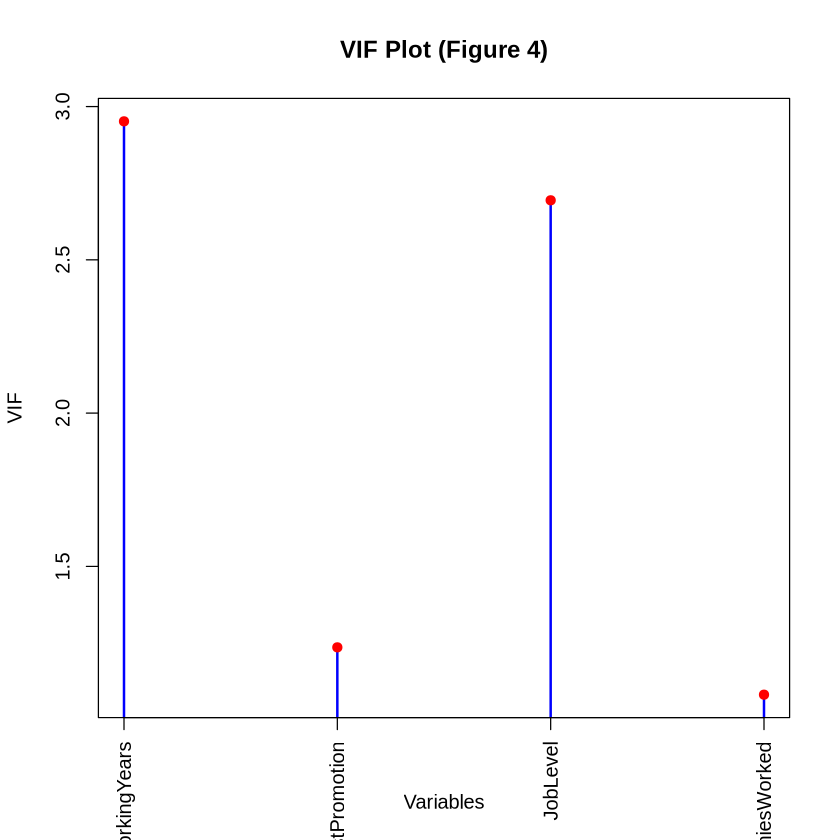

In [6]:
# Main developers: Justin Zhu
# Contributor: Angela Yandrofski, Shuri Yamamoto, Yiwen Guo 

# Fit a linear regression model with selected predictors
model1 <- lm(MonthlyIncome ~ TotalWorkingYears + YearsSinceLastPromotion + 
              JobLevel + NumCompaniesWorked, data = training_hr)

# Compute the Variance Inflation Factor (VIF) for each predictor
vif_values <- vif(model1)

# Organize the VIF values into a data frame
vif_df <- data.frame(Variable = names(vif_values), VIF = vif_values)

# Plot the VIF values 
plot(1:nrow(vif_df), vif_df$VIF, type = "h", lwd = 2, col = "blue",
     xlab = "Variables", ylab = "VIF", main = "VIF Plot (Figure 4)",
     xaxt = "n")
axis(1, at = 1:nrow(vif_df), labels = vif_df$Variable, las = 2)
points(1:nrow(vif_df), vif_df$VIF, pch = 19, col = "red")
abline(h = 5, col = "darkgreen", lty = 2)

#### **Explanation of Association:**

Figure 3: In this plot, Cp starts high at around 500 when there is only 1 input variable. When the number of predictors increases, Cp generally decreases, indicating improved model fit. The blue horizontal line represents the minimum Cp value achieved, so we choose 9 to be the ideal number of predictors where the red dots first achieve the smallest value of Cp.

Figure 4: From this plot, we can find predictors with VIF values are all below 5, so multicollinearity is not a significant concern.

------------

### **Methods: Plan**

#### **Feature Selection Process:**

The goal of the feature selection process is to determine the optimal predictors to include in the multiple linear regression model by using a forward selection approach. We start from no predictors in the model, then evaluate adding each potential predictors one by one to choose the variable that gives the biggest improvement in model fit until Cp is close to the number of predictors. In this case, we can determine monthly income based on total working years, years since last promotion, job level and number of companies worked because the variables demonstrated strong relationships with the outcome variable and significantly improved model fit.

#### **Written Analysis Method:** 

#### Step 1: Building the Regression Model

We use the variables selected from the forward selection process and build two regression models.
-  **Full model**: This model has all the significant predictors that we chose from the **forward selection** process, such as `JobRole`, `TotalWorkingYears`,  `YearsSinceLastPromotion`, `JobLevel`, `NumCompaniesWorked`.
-  **Simple model**: This model is a simpler version that only includes `Joblevel` as a predictor of `MonthlyIncome`. This model could be the baseline for comparing the performance of the more complex model.


The **forward selection** process identified the most relevant predictors for `MonthlyIncome`, including `JobRole`, `TotalWorkingYears`, `YearsSinceLastPromotion`, `JobLevel`, and `NumCompaniesWorked`. This step ensures that we are using the most important variables while avoiding overfitting.

The **full model** explains 94.66% of the variance in `MonthlyIncome` and includes several important predictors like `JobRole`, `TotalWorkingYears`, `YearsSinceLastPromotion`, and `JobLevel`, with `JobLevel` being the strongest predictor of income. The model is statistically significant and performs very well.

The **simple model**, with just `JobLevel` as the predictor, still explains a large portion of the variance (90.66%) but is less accurate than the **full model**.

#### Step 2: Checking Multicollinearity (VIF)

We check for multicollinearity among the predictors using the **Variance Inflation Factor (VIF)**. We plot the VIF values to visually inspect which variables might be problematic. In this case, no predictor has a **VIF** greater than 5, suggesting that multicollinearity is not a significant issue. Meaning the predictors are not highly correlated with each other and the model’s coefficients are reliable for prediction. 

#### Step 3: Model Evaluation

After fitting both the **simple model** and the **full model**, we evaluate their performance using several metrics:
- **Model Significance**: We use the summary() function to check the significance of each coefficient in the models. The $p$-values indicate whether the variables significantly predict MonthlyIncome. A small $p$-value (typically < 0.05) suggests that the predictor is significantly related to the outcome.
-  **Model Fit**: We assess how well the models fit the data by examining the **R-squared** and **Adjusted R-squared** values. The **R-squared** value indicates the proportion of the variance in `MonthlyIncome` that is explained by the predictors. **Adjusted R-squared** restricts the inclusion of irrelevant predictors, giving us a more realistic measure of model performance when comparing models with different numbers of predictors.
-  **ANOVA**: We perform an **Analysis of Variance (ANOVA)** to compare the two models. This test helps determine whether the more complex model (full model) significantly improves the fit compared to the simple model.

The **ANOVA** test shows whether the inclusion of additional predictors (beyond `JobLevel`) significantly improves the model’s performance.

Both the **simple model** (which includes only `JobLevel`) and the **full model** (which includes additional predictors) provided useful insights. The **full model**, which considers several factors, likely gives a more subtle prediction of `MonthlyIncome`, as indicated by its higher **Adjusted R-squared** and the significant results from the **ANOVA** test.

#### Step 4: Predicting and Evaluating the Model on Test Data

We use the **full model** to predict `MonthlyIncome` for the **testing set**. These predictons are compared to the actual values of `MonthlyIncome` in the testing set to assess the predictive accuuracy of the model. 

We calculate the **root mean squared error (RMSE)** to quantify the model's prediction error. A lower **RMSE** indicates better model performance. The **RMSE** value tells us how much, on average, the predicted `MonthlyIncome` deviates from the actual value in the testing set.

JobLevel is the most influential predictor of MonthlyIncome. Other predictors like JobRole, TotalWorkingYears, and NumCompaniesWorked also play important roles, but their effects are more subtle and variable 

In [ ]:
# Main developers: Justin Zhu
# Contributor: Angela Yandrofski, Shuri Yamamoto, Yiwen Guo 

set.seed(555)

# Fit a full linear regression model with multiple predictors and a tidy summary of the full model's coefficients
full_model <- lm(MonthlyIncome ~ JobRole + TotalWorkingYears + YearsSinceLastPromotion + 
              JobLevel + NumCompaniesWorked, data = training_hr)
tidy(full_model)
full_model

# Fit a simple linear regression model with just JobLevel
simple_model <- lm(MonthlyIncome ~ JobLevel, data = training_hr)
simple_model

# Get a glance at key statistics for both models
glance(full_model)
glance(simple_model)

In [ ]:
# Main developers: Justin Zhu
# Contributor: Angela Yandrofski, Shuri Yamamoto, Yiwen Guo 

# Perform an ANOVA to compare the simple and full models
anova(simple_model,full_model)

# Make predictions using the full model on the test data
hr_predictions <- predict(full_model, newdata = testing_hr)

# Calculate the residuals
residuals <- testing_hr$MonthlyIncome - hr_predictions

# Calculate the Root Mean Squared Error (RMSE) as a measure of prediction accuracy
rmse <- sqrt(mean(residuals^2))
rmse

---------

### **Discussion:**

The full model’s result indicates very high predictive power with an R-squared value of 0.9466 and adjusted R-squared value is 0.9460 for selected predictors:
- With each step up in job level corresponds with a about a 2,817.91 dollar statistically significant increase in monthly income which means there is a strong relationship between career progression and being compensated monthly. 
- With each additional year of work leads to about a 37.11 dollar statistically significant increase in monthly income. And With each additional year since the last promotion, it statistically significantly increases monthly income by $24.32. Which means that having more experience, in general, corroborates to a higher pay. 
- It’s important to note the model revealed certain job roles have substantial income differences, which was an expected result. Managers and Research directors have the highest monthly incomes, which makes sense for their level of work. 

These results were what we expected to find as we know that if you have been at a job longer and your job level is higher, then it is likely that your compensation would be better. As it wouldn’t make sense that an entry level worker that’s worked 1 month would have a monthly income equal to that of a manager that’s worked there 10 years. Regardless of promotion or not. 

The implications of these are that improving your career progression is incredibly important for monetary gain. This is coupled with making sure you stay at a company for a few years to get compensated well, experience, for this company in the dataset, matters. This could give employees a good idea of what to focus on: advancing job level, improving the number of work experience years, and making sure to get good promotions every few years.

For our analysis, although these factors are significantly correlated with monthly income, there is no analysis about monthly income trends over time. So another question that we can further explore is "How does income progression change over time for individuals within different job roles or industries?". We believe that these further questions will be answered in the future and can further help employees with monthly income increases.

One limitation of our model is the fact that even though the model is quite accurate, it is limited to this specific dataset which means it's not a wide view of other companies and their work environments. The model could be improved with a LASSO analysis to see if we would be able to eliminate more variables to provide a more accurate look at predicting monthly income, additionally, we could also branch out and use more datasets to test our model to see if the explanatory variables we found were similar across other HR datasets. 

In conclusion, the model can predict an employee’s monthly income with extremely high accuracy given the 5 chosen explanatory variables.

### **References:**

Bakan, Ismail, and Tuba Buyukbese. "The Relationship between Employees' Income Level and Employee Job Satisfaction: An Empirical Study." *International Journal of Business and Social Science*, vol. 4, no. 7, July 2013, pp. 18-19.

Hijuzaman, Osep, et al. "Analysis of Salary Influence on Employee Performance Through Mediation Motivation and Wellbeing Variables." *The 2nd International Conference on Government Education Management and Tourism (ICoGEMT)+TECH*, 15 Jan. 2022, Bandung City, Indonesia.

Iqbal, Shuja, et al. "Effects of Job Organizational Culture, Benefits, Salary on Job Satisfaction Ultimately Affecting Employee Retention." *Review of Public Administration and Management*, vol. 05, no. 03, Jan. 2017. 

Ranta, Mikko, and Mika Ylinen. “Employee Benefits and Company Performance: Evidence from a High-Dimensional Machine Learning Model.” *Management Accounting Research*, vol. 64, no. 64, 27 Dec. 2023, p. 100876.